In [20]:
import matplotlib.pyplot as plt

In [21]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random x and y values (100 data points)
n = 200  # Number of rows
x = np.random.uniform(0, 10, n)  # Random values for x between 0 and 10
y = np.random.uniform(0, 10, n)  # Random values for y between 0 and 10

# Create a non-linear condition (circle equation: (x-5)^2 + (y-5)^2 < r^2)
radius = 5  # Define a radius
center_x, center_y = 5, 5  # Center of the circle
distance = (x - center_x)**2 + (y - center_y)**2  # Calculate distance from center

# Classify based on whether the point is inside or outside the circle
output = np.where(distance < radius**2, 1, 0)

# Create a DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y,
    'output': output
})

# Display the first 5 rows
print(df.head(5))


          x         y  output
0  3.745401  6.420316       1
1  9.507143  0.841400       0
2  7.319939  1.616287       1
3  5.986585  8.985542       1
4  1.560186  6.064291       1


In [22]:
df.head()


,x,y,output
0,3.745401,6.420316,1
1,9.507143,0.841400,0
2,7.319939,1.616287,1
3,5.986585,8.985542,1
4,1.560186,6.064291,1


In [23]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

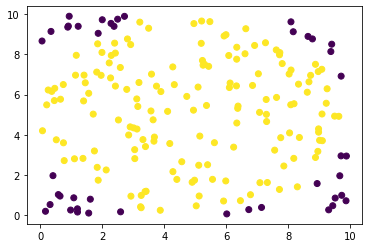

In [24]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y.astype('category').cat.codes, cmap='viridis')

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [26]:
clf.fit(X,y)

LogisticRegression()

/home/suhas/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


<AxesSubplot:>

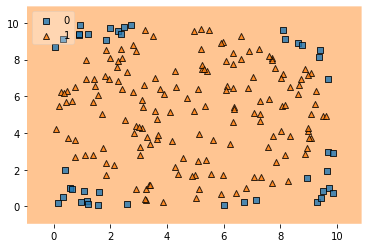

In [27]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values,clf,legend=2)

In [28]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.785

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)
X_trf = poly.fit_transform(X)

In [30]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

0.9749999999999999

In [35]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X.iloc[:,0].min()-1, stop=X.iloc[:,0].max()+1, step=0.01)
    b=np.arange(start=X.iloc[:,1].min()-1, stop=X.iloc[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

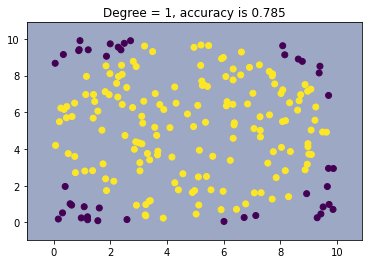

In [36]:
plot_decision_boundary(X,y)

/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


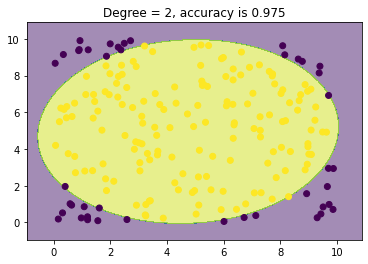

In [37]:
plot_decision_boundary(X,y,degree=2)

/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

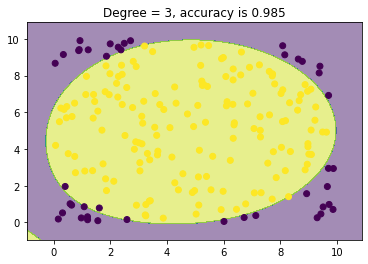

In [38]:
plot_decision_boundary(X,y,degree=3)

/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

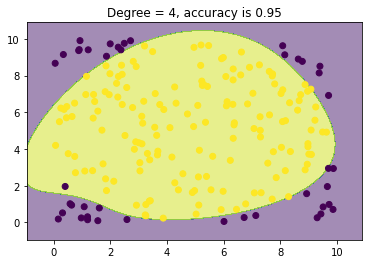

In [39]:
plot_decision_boundary(X,y,degree=4)

/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/suhas/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

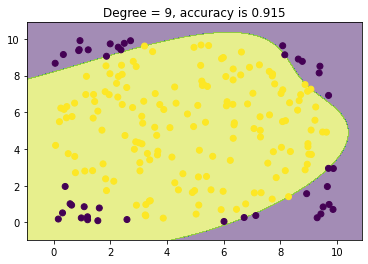

In [41]:
plot_decision_boundary(X,y,degree=9)